# DS 7331 Data Mining: Lab 1 iPython Notebook

### Created On: January 19, 2019
### Authors:  
####                 Arora, Tanvi                
####                 Chandna, Rajat
####                 Henderson Kuns, Nicole
####                 Kumar, Ramasundaram
####                 Vasquez, James


# Business Understanding 

# Data Meaning Type

# Data Quality

In [1]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inside the iPython Notebook itself
%matplotlib inline

In [2]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



In [3]:
# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")
bankPromo_df.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [4]:
bankPromo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Data Types for columns are matching as specified in data description. Columns containing numeric data are represented as of type "int64" ( values in those columns is integer and not float) and columns containing categorical variables are represented as of type "object".

dtypes: int64(7), object(10)

Also, number of entries in all columns is same, signalling that either data contains no missing values or missing values have been already replaced with some specific values(eg -1,999 or mean/median of the series etc). Next we would try to uncover details on these missing values.

In [5]:
bankPromo_df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [17]:
# To find duplicated rows in data Frame
bankPromo_df.duplicated().any()

False

In [6]:
# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

In [7]:
bankPromo_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromo_df.columns:
    if bankPromo_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromo_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass

print(numericalVars)
print(categoricalVars)


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']


In [9]:
for categoricalCol in categoricalVars:
    print("\n The Unique values(Levels) for \033[1m %s \033[0m variable are: \n" %categoricalCol.upper())
    print(pd.Series(bankPromo_df[categoricalCol].unique()))



 The Unique values(Levels) for  JOB  variable are: 

0        management
1        technician
2      entrepreneur
3       blue-collar
4           unknown
5           retired
6            admin.
7          services
8     self-employed
9        unemployed
10        housemaid
11          student
dtype: object

 The Unique values(Levels) for  MARITAL  variable are: 

0     married
1      single
2    divorced
dtype: object

 The Unique values(Levels) for  EDUCATION  variable are: 

0     tertiary
1    secondary
2      unknown
3      primary
dtype: object

 The Unique values(Levels) for  DEFAULT  variable are: 

0     no
1    yes
dtype: object

 The Unique values(Levels) for  HOUSING  variable are: 

0    yes
1     no
dtype: object

 The Unique values(Levels) for  LOAN  variable are: 

0     no
1    yes
dtype: object

 The Unique values(Levels) for  CONTACT  variable are: 

0      unknown
1     cellular
2    telephone
dtype: object

 The Unique values(Levels) for  MONTH  variable are: 

0   

Looks like for categorical variables, the missing values in columns is replaced with string "unknown" as seen from several columns above. Next look at percentage(%) of observations that are missing in these categorical variables columns.

In [10]:
sumMissingValsinCategoricalCols = dict()
for categoricalCol in categoricalVars:
    sumMissingValsinCategoricalCols[categoricalCol] = (sum(bankPromo_df[categoricalCol] == "unknown") / \
                                                       bankPromo_df[categoricalCol].count()) * 100

pd.Series(sumMissingValsinCategoricalCols)


job            0.637013
marital        0.000000
education      4.107407
default        0.000000
housing        0.000000
loan           0.000000
contact       28.798301
month          0.000000
poutcome      81.747805
Subscribed     0.000000
dtype: float64

# Simple Statistics

In [11]:
# For Numerical Variables 
bankPromo_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


*** Any Interesting Find For Numerical Variables Should be entered here ***

In [15]:
# For Categorical Variables
for categoricalCol in categoricalVars:
    tmpDf1 = pd.DataFrame()
    tmpDf2 = pd.DataFrame()
    tmpDf1 = pd.crosstab(index = bankPromo_df[categoricalCol], columns = "Count", colnames = " ")
    tmpDf1["Proportion(in % of Total)"] = (tmpDf1["Count"] / tmpDf1["Count"].sum()) * 100
    tmpDf1 = tmpDf1.round(2)
    tmpDf1.index.name = tmpDf1.index.name.upper()
    tmpDf2 = pd.DataFrame(index = ["TOTAL"], data = [[tmpDf1["Count"].sum(), \
                                                      tmpDf1["Proportion(in % of Total)"].sum()]], \
                          columns=["Count", "Proportion(in % of Total)"])
    tmpDf1 = tmpDf1.append(tmpDf2)
    print("\n Counts and Frequency Table for \033[1m %s \033[0m variable is as: \n" %categoricalCol.upper())
    print(tmpDf1)
    print("\n")


 Counts and Frequency Table for  JOB  variable is as: 

               Count  Proportion(in % of Total)
admin.          5171                      11.44
blue-collar     9732                      21.53
entrepreneur    1487                       3.29
housemaid       1240                       2.74
management      9458                      20.92
retired         2264                       5.01
self-employed   1579                       3.49
services        4154                       9.19
student          938                       2.07
technician      7597                      16.80
unemployed      1303                       2.88
unknown          288                       0.64
TOTAL          45211                     100.00



 Counts and Frequency Table for  MARITAL  variable is as: 

          Count  Proportion(in % of Total)
divorced   5207                      11.52
married   27214                      60.19
single    12790                      28.29
TOTAL     45211                     

*** Any Interesting Find For Categorical Variables Should be entered here ***

# Visualize Attributes

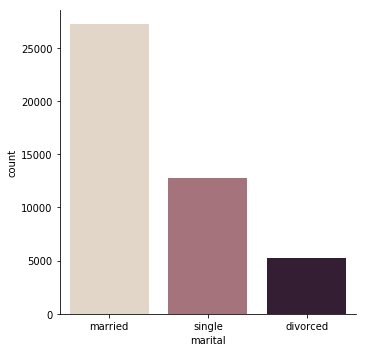

In [34]:
sns.catplot(x="marital", kind="count", palette="ch:.25", data=bankPromo_df)

# Explore Joint Attributes

# Explore Attributes and Class

# New Features

# Exceptional Work